Found 2047 images belonging to 43 classes.
Found 496 images belonging to 43 classes.


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 60s 895ms/step - accuracy: 0.0312 - loss: 3.7949 - val_accuracy: 0.0323 - val_loss: 3.7281
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 54s 833ms/step - accuracy: 0.0504 - loss: 3.7310 - val_accuracy: 0.0524 - val_loss: 3.6379
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 824ms/step - accuracy: 0.0677 - loss: 3.6098 - val_accuracy: 0.0806 - val_loss: 3.5944
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 825ms/step - accuracy: 0.0824 - loss: 3.5539 - val_accuracy: 0.1230 - val_loss: 3.4869
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 835ms/step - accuracy: 0.1465 - loss: 3.3137 - val_accuracy: 0.1532 - val_loss: 3.3411
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 842ms/step - accuracy: 0.2300 - loss: 2.9306 - val_accuracy: 0.2036 - val_loss: 3.1347
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 835ms/step - accuracy: 0.3294 - loss: 2.4723 - val_accuracy: 0.2540 - val_loss: 3.0614
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 836ms/step - accuracy: 0.4614 - loss: 1.9520 - val_accu

Model saved to C:\Users\sagni\Downloads\poaching_model.h5


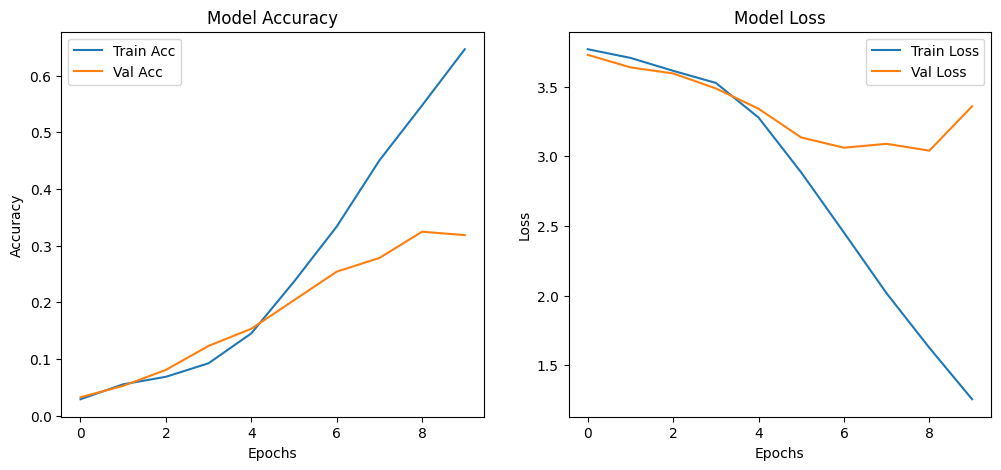

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 568ms/step


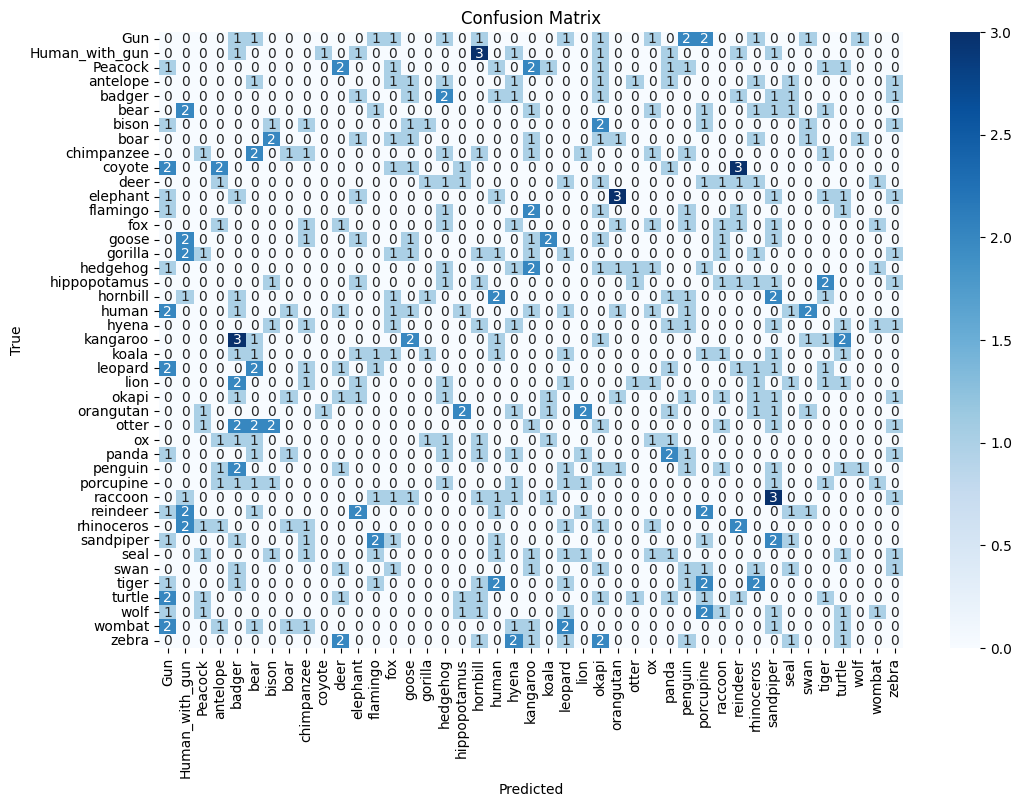

                precision    recall  f1-score   support

           Gun       0.00      0.00      0.00        16
Human_with_gun       0.00      0.00      0.00        11
       Peacock       0.00      0.00      0.00        13
      antelope       0.00      0.00      0.00        11
        badger       0.00      0.00      0.00        11
          bear       0.00      0.00      0.00        10
         bison       0.11      0.10      0.11        10
          boar       0.00      0.00      0.00        11
    chimpanzee       0.09      0.08      0.09        12
        coyote       0.00      0.00      0.00        11
          deer       0.00      0.00      0.00        11
      elephant       0.09      0.09      0.09        11
      flamingo       0.00      0.00      0.00         8
           fox       0.00      0.00      0.00        12
         goose       0.09      0.09      0.09        11
       gorilla       0.00      0.00      0.00        12
      hedgehog       0.07      0.09      0.08  

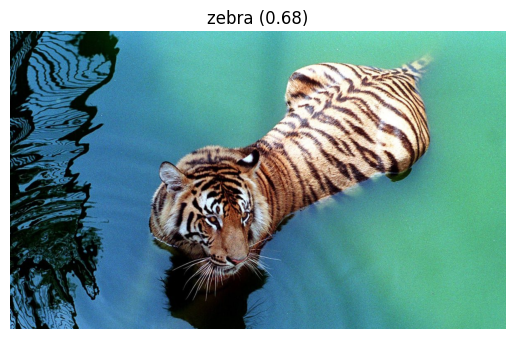

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

# ======= Paths =======
dataset_dir = r"C:\Users\sagni\Downloads\archive (1)\archive\animals\animals"
model_save_path = r"C:\Users\sagni\Downloads\poaching_model.h5"
test_image_path = r"C:\Users\sagni\Downloads\archive (1)\archive\animals\animals\tiger\0ce688e813.jpg"

# ======= Parameters =======
img_height, img_width = 128, 128
batch_size = 32
epochs = 10

# ======= Data Loading =======
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_gen.class_indices.keys())

# ======= Model =======
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ======= Training =======
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

# Save model
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# ======= Accuracy/Loss Graphs =======
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.show()

# ======= Confusion Matrix (Heatmap) =======
val_gen.reset()
y_true = val_gen.classes
y_pred = np.argmax(model.predict(val_gen), axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ======= Classification Report =======
print(classification_report(y_true, y_pred, target_names=class_names))

# ======= Prediction on a Single Image =======
from tensorflow.keras.preprocessing import image

img = image.load_img(test_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
confidence = np.max(pred)

print(f"Predicted: {predicted_class} ({confidence:.2f})")

plt.imshow(image.load_img(test_image_path))
plt.title(f"{predicted_class} ({confidence:.2f})")
plt.axis('off')
plt.show()
